In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read data
results = pd.read_csv('results.csv')
# filter nan
results = results[results['Clean Acc'].notna()]
results
sns.set(style='ticks', palette='bright', font_scale=1.5)

In [6]:
results

,seed,shot,k,attack,Clean Acc,Attack Acc,ASR,Perturbed Word Ratio,Attack Perplexity
0,1,16,1,textfooler,77.75,26.61,65.78,8.79,88.62
1,1,16,3,textfooler,84.40,23.74,71.88,11.08,101.26
2,1,16,7,textfooler,87.16,26.03,70.13,11.86,104.43
3,1,16,15,textfooler,87.04,26.03,70.09,12.02,107.89
4,1,32,1,textfooler,81.42,33.60,58.73,7.95,84.58
5,1,32,3,textfooler,84.63,30.62,63.82,11.39,103.25
6,1,32,7,textfooler,86.47,30.50,64.72,11.78,103.04
7,1,32,15,textfooler,90.02,34.17,62.04,12.37,108.51
8,1,32,31,textfooler,90.71,37.73,58.41,12.66,110.19
9,1,64,1,textfooler,81.65,29.82,63.48,8.23,77.38


/tmp/ipykernel_88119/2801783226.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=clean_results, x='k', y='Clean Acc', hue='shot', palette=color_palette, ci=None, linewidth=2)
/tmp/ipykernel_88119/2801783226.py:19: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(data=clean_results, x='k', y='Clean Acc', hue='shot', palette=color_palette, ci=None, linewidth=2)


Text(0.5, 1.0, 'Clean Acc')

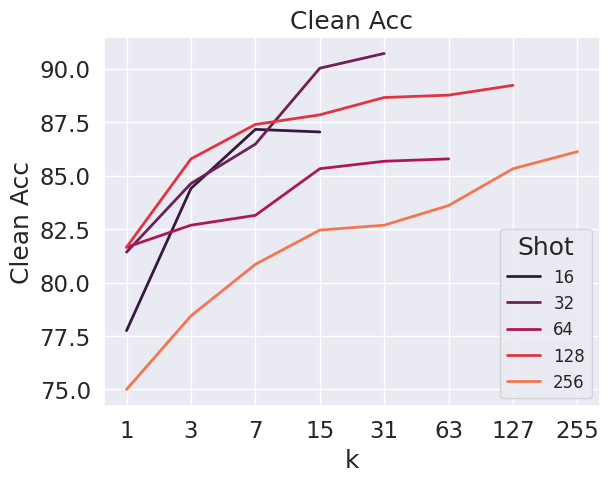

In [7]:
clean_results = results.drop(columns=['Attack Acc', 'ASR', 'attack', 'seed'])
# keep unique row
clean_results = clean_results.drop_duplicates()

ks = [1, 3, 7, 15, 31, 63, 127, 255]
# make k as string and categorical
clean_results['k'] = clean_results['k'].astype(str)
clean_results['k'] = clean_results['k'].astype('category')

color_palette = ['#311A3C', '#672555', '#9F2958', '#CF4448', '#E37D5A', '#ECB795']
color_palette = sns.color_palette("rocket")
# sort the k column
clean_results['k'] = clean_results['k'].cat.reorder_categories([str(k) for k in ks], ordered=True)
# plot line graph with k as the x-axis, Clean Acc as the y-axis and shot as the hue

# grid
sns.set_style("darkgrid")

sns.lineplot(data=clean_results, x='k', y='Clean Acc', hue='shot', palette=color_palette, ci=None, linewidth=2)
# legend
plt.legend(loc='lower right', title='Shot', fontsize=12)
# title "Clean Acc vs k"
plt.title('Clean Acc')
# rescale x-axis as categorical

/tmp/ipykernel_88119/3260291229.py:21: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(data=textfooloer_results, x='k', y='Attack Acc', hue='shot', palette=color_palette, linewidth=2)


Text(0.5, 1.0, 'Textfooler Accuracy')

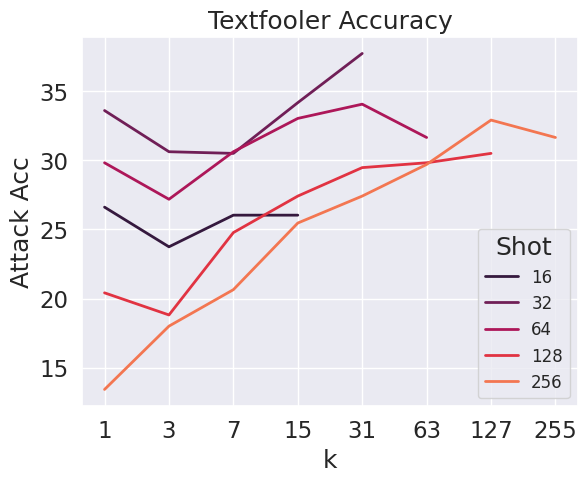

In [9]:
textfooloer_results = results[results['attack'] == 'textfooler']
textfooloer_results = textfooloer_results.drop(columns=['Clean Acc', 'ASR', 'attack', 'seed'])
# keep unique row
textfooloer_results = textfooloer_results.drop_duplicates()

ks = [1, 3, 7, 15, 31, 63, 127, 255]
# make k as string and categorical
textfooloer_results['k'] = textfooloer_results['k'].astype(str)
textfooloer_results['k'] = textfooloer_results['k'].astype('category')

color_palette = ['#311A3C', '#672555', '#9F2958', '#CF4448', '#E37D5A', '#ECB795']
color_palette = sns.color_palette("rocket")

# sort the k column
textfooloer_results['k'] = textfooloer_results['k'].cat.reorder_categories([str(k) for k in ks], ordered=True)
# plot line graph with k as the x-axis, Clean Acc as the y-axis and shot as the hue

# grid
sns.set_style("darkgrid")

sns.lineplot(data=textfooloer_results, x='k', y='Attack Acc', hue='shot', palette=color_palette, linewidth=2)
# legend
plt.legend(loc='lower right', title='Shot', fontsize=12)


# rescale x-axis as categorical
plt.title('Textfooler Accuracy')

In [5]:
textbugger_results = results[results['attack'] == 'textbugger']
textbugger_results = textbugger_results.drop(columns=['Clean Acc', 'ASR', 'attack', 'seed'])

# keep unique row
textbugger_results = textbugger_results.drop_duplicates()
ks = [1, 3, 7, 15, 31, 63, 127, 255]
# make k as string and categorical
textbugger_results['k'] = textbugger_results['k'].astype(str)
textbugger_results['k'] = textbugger_results['k'].astype('category')

color_palette = sns.color_palette("rocket")

# color_palette = ['#311A3C', '#672555', '#9F2958', '#CF4448', '#E37D5A', '#ECB795']
# # sort the k column
textbugger_results['k'] = textbugger_results['k'].cat.reorder_categories([str(k) for k in ks], ordered=True)
# # plot line graph with k as the x-axis, Clean Acc as the y-axis and shot as the hue

# grid
sns.set_style("darkgrid")

sns.lineplot(data=textbugger_results, x='k', y='Attack Acc', hue='shot', palette=color_palette, linewidth=2)
# legend
plt.legend(loc='upper right', title='Shot', fontsize=12)
# # rescale x-axis as categorical
plt.title('Textbugger Accuracy')

ValueError: items in new_categories are not the same as in old categories